In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import MDS

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
df=pd.read_csv('9000a 09520.csv')

In [5]:
df.head()

Machine_Name Additional_Info_1                 Additional_Info_2  \
0           NaN       9000a 09520                                     
1           NaN       9000a 09520                                     
2           NaN       9000a 09520                                     
3           NaN       9000a 09520                                     
4           NaN       9000a 09520                                     

                   TimeStamp  Shot_Number  NGmark  Injection_Time  \
0  2022-05-30 10:10:47+09:00       3315.0       1            7.66   
1  2022-05-30 10:10:47+09:00       3316.0       1            7.66   
2  2022-05-30 10:10:47+09:00       3317.0       1            7.66   
3  2022-05-30 10:10:47+09:00       3318.0       1            7.66   
4  2022-05-30 10:10:47+09:00       3319.0       1            7.66   

   Filling_Time  Plasticizing_Time  Cycle_Time  Clamp_Close_Time  \
0          3.66          25.150000   66.099998              4.57   
1          3.66          25.129999   66.099998              4.57   
2          3.66          25.180000   66.099998              4.57   
3          3.66          25.160000   66.099998              4.58   
4          3.66          25.160000   66.099998              4.56   

   Cushion_Position  Switch_Over_Position  Plasticizing_Position  \
0              21.6                  23.0             158.199997   
1              21.6                  23.0             158.100006   
2              21.5                  22.9             158.199997   
3              21.6                  23.0             158.199997   
4              21.6                  23.0             158.199997   

   Clamp_Open_Position  Max_Injection_Speed  Max_Screw_RPM  Average_Screw_RPM  \
0          1028.199951            47.400002           69.0               59.0   
1          1028.300049            47.400002           62.0               59.0   
2          1028.400024            47.400002           61.0               59.0   
3          1028.500000            47.400002           69.0               59.0   
4          1028.300049            47.400002           62.0               59.0   

   Max_Injection_Pressure  Max_Switch_Over_Pressure  Max_Back_Pressure  \
0               92.800003                 88.300003          24.200001   
1               93.199997                 88.400002          24.299999   
2               92.800003                 88.400002          24.200001   
3               92.699997                 88.800003          24.200001   
4               92.699997                 88.000000          24.299999   

   Average_Back_Pressure  Barrel_Temperature_1  Barrel_Temperature_2  \
0                   22.9            191.699997            209.800003   
1                   22.9            191.500000            209.000000   
2                   22.9            191.399994            208.899994   
3                   22.9            191.199997            209.199997   
4                   22.9            191.399994            210.199997   

   Barrel_Temperature_3  Barrel_Temperature_4  Barrel_Temperature_5  \
0            235.199997            225.000000            208.000000   
1            235.199997            225.100006            207.899994   
2            235.300003            225.100006            208.000000   
3            235.100006            224.899994            208.000000   
4            235.000000            225.000000            207.899994   

   Barrel_Temperature_6  Barrel_Temperature_7  Hopper_Temperature  \
0            189.899994             39.599998                 0.0   
1            190.000000             39.799999                 0.0   
2            190.000000             40.000000                 0.0   
3            189.899994             40.099998                 0.0   
4            189.899994             40.200001                 0.0   

   Mold_Temperature_1  Mold_Temperature_2  Mold_Temperature_3  \
0                 0.0                 0.0                 0.0   
1     

In [6]:
weight = df[df['Weight'] > 0].reset_index(drop=True)

In [7]:
weight.describe()

Machine_Name    Shot_Number   NGmark  Injection_Time  Filling_Time  \
count           0.0   53353.000000  53353.0    53353.000000  53353.000000   
mean            NaN   44539.070249      1.0        9.003653      4.259262   
std             NaN   24439.541918      0.0        1.165146      1.231021   
min             NaN    3315.000000      1.0        6.460000      1.540000   
25%             NaN   26792.000000      1.0        8.400000      3.310000   
50%             NaN   40797.000000      1.0        9.680000      4.180000   
75%             NaN   55641.000000      1.0        9.770000      4.270000   
max             NaN  121979.000000      1.0       17.990000     14.990000   

       Plasticizing_Time     Cycle_Time  Clamp_Close_Time  Cushion_Position  \
count       53353.000000   53353.000000      53353.000000      53353.000000   
mean           35.185938      94.043680          7.039465         21.243280   
std           929.726158    1610.144875        464.858326          4.700228   
min             9.780000      45.200001          2.310000          6.200000   
25%            26.620001      69.500000          5.050000         22.000000   
50%            28.230000      70.599998          5.070000         23.799999   
75%            30.219999      71.699997          5.090000         24.299999   
max        107405.789062  107446.601562     107379.242188         24.900000   

       Switch_Over_Position  Plasticizing_Position  Clamp_Open_Position  \
count          53353.000000           53353.000000         53353.000000   
mean              22.109808             154.948912          1014.236579   
std                5.038619              16.561295            48.284894   
min                7.500000              84.400002           805.099976   
25%               23.400000             158.000000          1022.700012   
50%               25.000000             159.600006          1024.800049   
75%               25.000000             161.399994          1027.500000   
max               26.000000             166.399994          1032.199951   

       Max_Injection_Speed  Max_Screw_RPM  Average_Screw_RPM  \
count         53353.000000   53353.000000       53353.000000   
mean             49.339807      58.162353          53.547748   
std               7.535024       9.894455           8.530939   
min              40.799999      48.000000          45.000000   
25%              42.000000      52.000000          49.000000   
50%              47.099998      55.000000          49.000000   
75%              53.700001      61.000000          56.000000   
max              71.099998     189.000000          86.000000   

       Max_Injection_Pressure  Max_Switch_Over_Pressure  Max_Back_Pressure  \
count            53353.000000              53353.000000       53353.000000   
mean                96.718516                 89.999625          25.137661   
std                  5.847844                  5.660197           1.892912   
min                 63.500000                 49.400002          19.600000   
25%                 92.400002                 84.699997          23.400000   
50%                 97.800003                 90.400002          25.000000   
75%                101.800003                 94.400002          27.100000   
max                117.199997                104.900002          30.000000   

       Average_Back_Pressure  Barrel_Temperature_1  Barrel_Temperature_2  \
count           53353.000000          53353.000000          53353.000000   
mean               23.523543            195.445544            205.548376   
std                 1.950776              3.164438              4.994321   
min                18.400000            187.800003            198.600006   
25%                22.000000            193.000000            200.100006   
50%                23.000000            197.800003            209.199997   
75%                25.600000            198.000000            210.100006   
max                28.100000         

## AZ 컬럼 이전 유의미 Columns plot

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

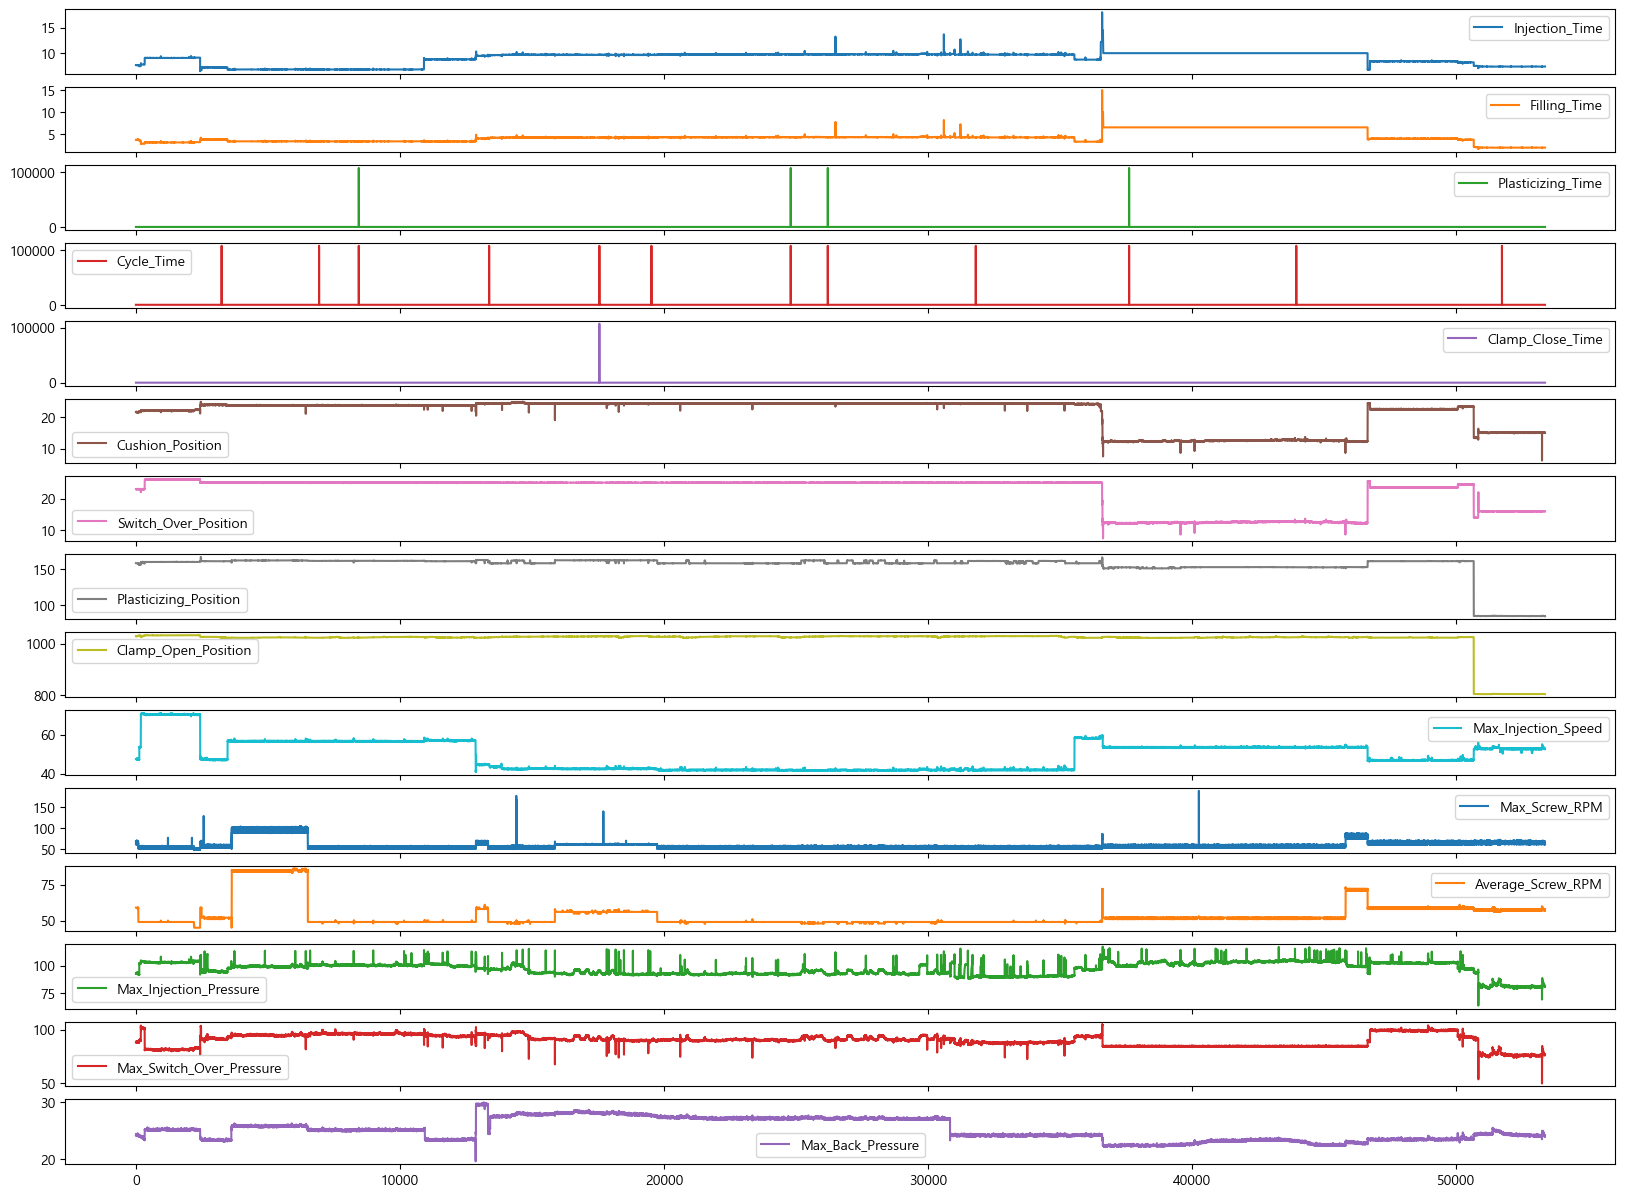

In [8]:
val_cols = ['Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time','Clamp_Close_Time','Cushion_Position','Switch_Over_Position',
            'Plasticizing_Position','Clamp_Open_Position','Max_Injection_Speed','Max_Screw_RPM','Average_Screw_RPM','Max_Injection_Pressure','Max_Switch_Over_Pressure','Max_Back_Pressure']

weight[val_cols].plot(subplots=True,figsize=(20, 15))

#### 유효 4 Columns : Injection_Time, Cushion_Position, Max_Screw_RPM, Max_Injection_Pressure

##### 비교적 특성이 다르다고 생각되는 컬럼 위주로 선정하였고 해당 변수들의 분포 또한 이상 정상 범주를 구분하기에 적합하다고 판단

In [9]:
weight['Injection_Time'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

In [10]:
weight['Cushion_Position'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

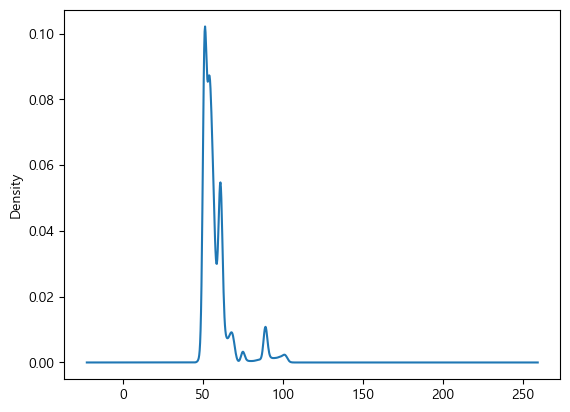

In [11]:
weight['Max_Screw_RPM'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

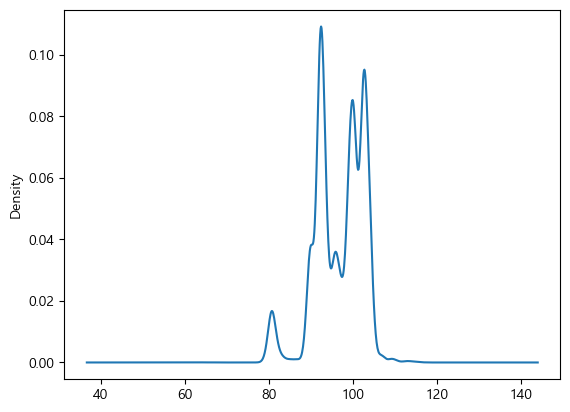

In [12]:
weight['Max_Injection_Pressure'].plot(kind='density')

## AZ 컬럼 이후 값들의 Plots 
#### Alarm1L, Alarm2H, Alarm2L, All_Time, HScaleV, Hopper_PV, Hopper_SV, LScaleV, Product_CNT, Robot_Alarm, TakeOut_Time, TempCon_PV, TempCon_SV, Weight, Weight_Status

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

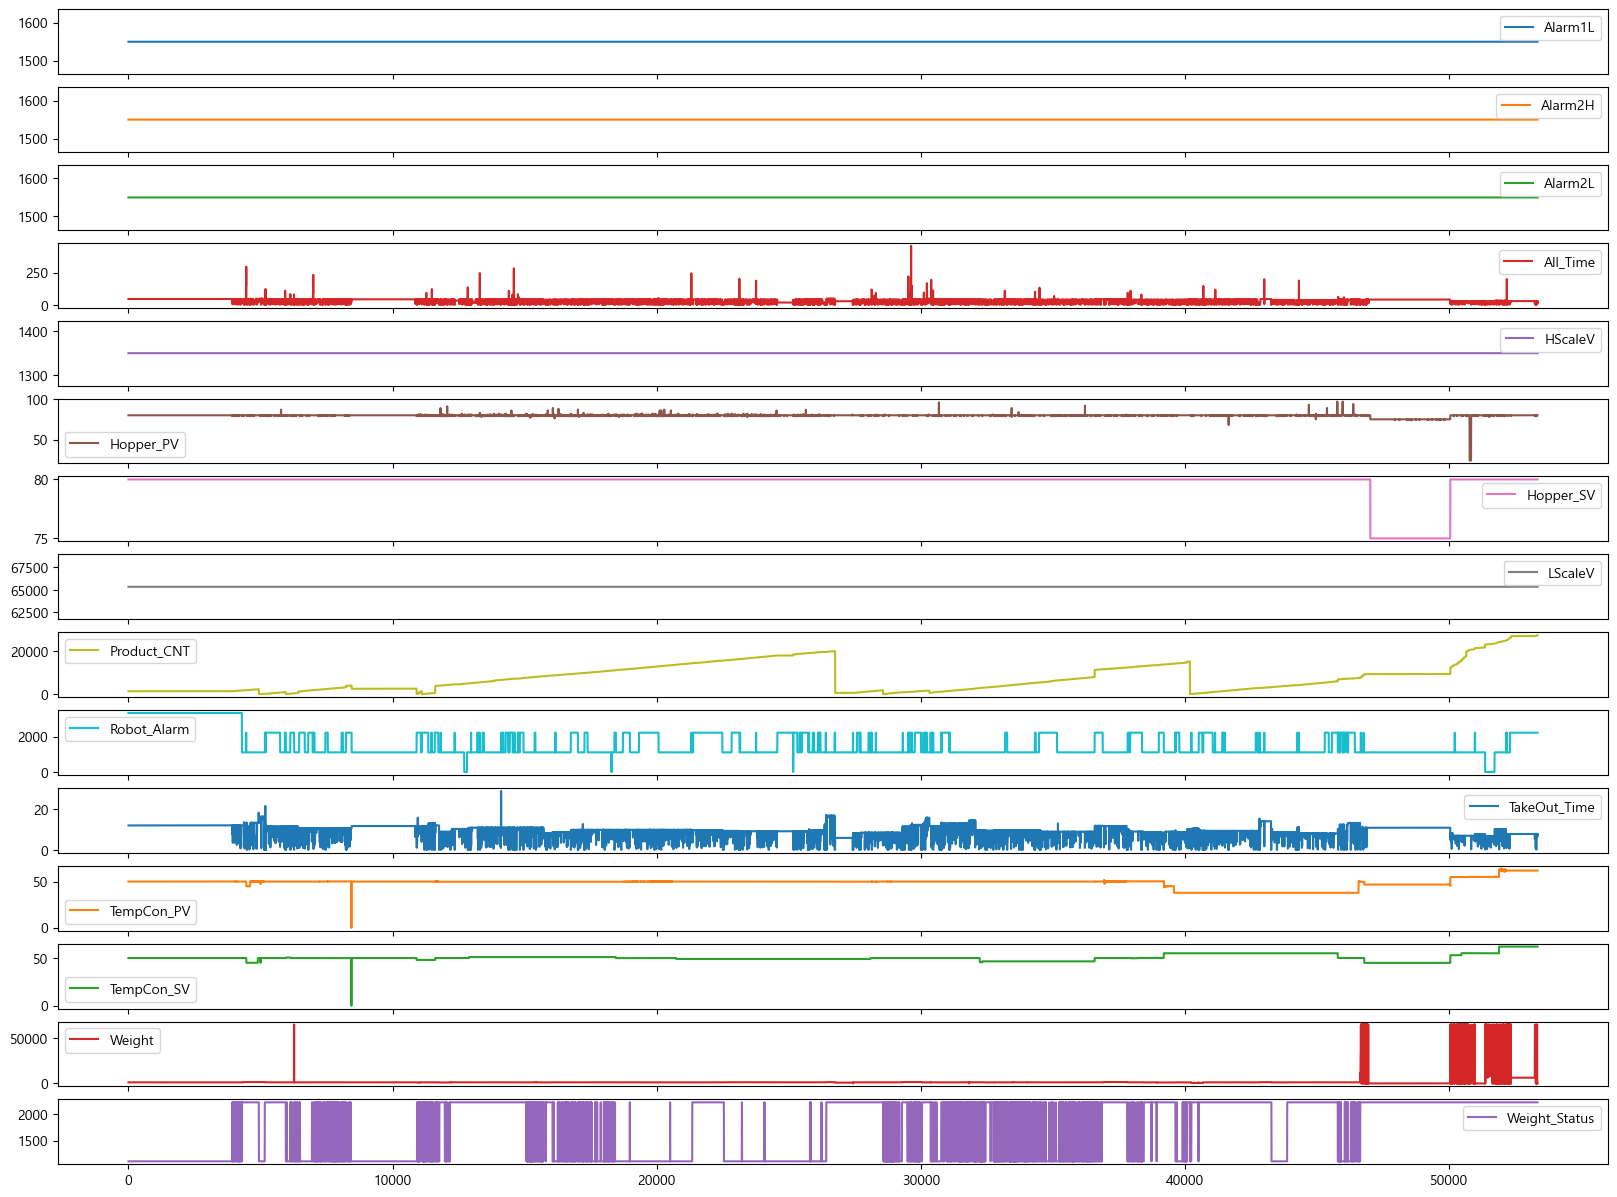

In [13]:
val_cols = ['Alarm1L', 'Alarm2H', 'Alarm2L', 'All_Time', 'HScaleV', 'Hopper_PV', 'Hopper_SV', 'LScaleV', 'Product_CNT', 'Robot_Alarm', 'TakeOut_Time', 'TempCon_PV', 'TempCon_SV', 'Weight', 'Weight_Status']

weight[val_cols].plot(subplots=True,figsize=(20, 15))

#### 유효 3 Columns : All_Time, TakeOut_Time, Hopper_PV

##### AZ 컬럼 이후의 값들은 다소 단조로운 경향이 있으므로, 정상, 이상 분포의 특성을 추출할 수 있는 컬럼으로 선정함

<AxesSubplot:ylabel='Density'>

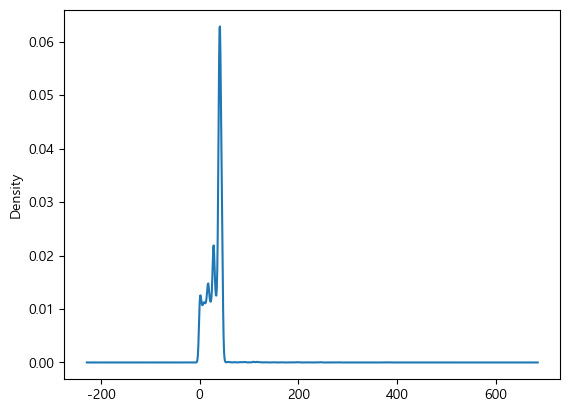

In [14]:
weight['All_Time'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

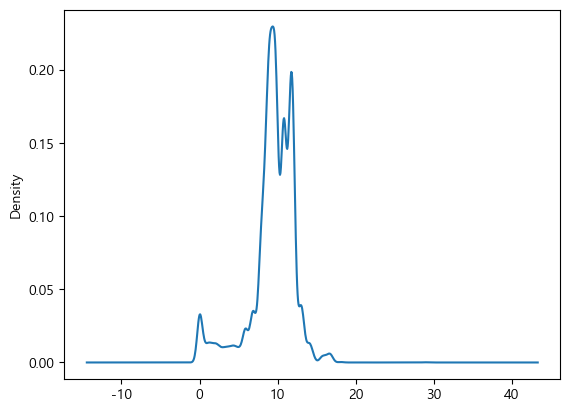

In [15]:
weight['TakeOut_Time'].plot(kind='density')

In [16]:
weight['Hopper_PV'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

## Multivariate Anomaly Detection

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import MinCovDet

In [18]:
val_cols = ['Injection_Time','Cushion_Position','Max_Screw_RPM','Max_Injection_Pressure','All_Time','Hopper_PV','TakeOut_Time']

In [19]:
process_df = weight[val_cols]

process_df

Injection_Time  Cushion_Position  Max_Screw_RPM  \
0                7.66              21.6           69.0   
1                7.66              21.6           62.0   
2                7.66              21.5           61.0   
3                7.66              21.6           69.0   
4                7.66              21.6           62.0   
...               ...               ...            ...   
53348            7.36              15.0           61.0   
53349            7.36              15.0           61.0   
53350            7.38              15.1           61.0   
53351            7.36              15.1           62.0   
53352            7.38              15.0           62.0   

       Max_Injection_Pressure  All_Time  Hopper_PV  TakeOut_Time  
0                   92.800003     45.19       80.0         11.95  
1                   93.199997     45.19       80.0         11.95  
2                   92.800003     45.19       80.0         11.95  
3                   92.699997     45.19       80.0         11.95  
4                   92.699997     45.19       80.0         11.95  
...                       ...       ...        ...           ...  
53348               80.400002     26.33       80.0          7.79  
53349               81.099998     26.33       80.0          7.79  
53350               80.900002     26.33       80.0          7.79  
53351               80.800003     26.33       80.0          7.79  
53352               81.099998     26.33       80.0          7.79  

[53353 rows x 7 columns]

In [20]:
process_df.describe()

Injection_Time  Cushion_Position  Max_Screw_RPM  \
count    53353.000000      53353.000000   53353.000000   
mean         9.003653         21.243280      58.162353   
std          1.165146          4.700228       9.894455   
min          6.460000          6.200000      48.000000   
25%          8.400000         22.000000      52.000000   
50%          9.680000         23.799999      55.000000   
75%          9.770000         24.299999      61.000000   
max         17.990000         24.900000     189.000000   

       Max_Injection_Pressure      All_Time     Hopper_PV  TakeOut_Time  
count            53353.000000  53353.000000  53353.000000  53353.000000  
mean                96.718516     30.535528     79.573126      9.364662  
std                  5.847844     16.712654      2.246776      2.892672  
min                 63.500000      0.000000     24.000000      0.000000  
25%                 92.400002     18.810000     80.000000      8.600000  
50%                 97.800003     36.260000     80.000000      9.690000  
75%                101.800003     40.930000     80.000000     11.400000  
max                117.199997    457.000000     97.000000     28.860000

In [21]:
scaler = StandardScaler()

scaled = scaler.fit_transform(process_df)
scaled_df = pd.DataFrame(scaled, columns=process_df.columns)

In [22]:
# 모델 생성 및 학습
n_components = 4  # 가우시안 분포 수, 조정 가능
gmm = GaussianMixture(n_components=n_components)
gmm.fit(scaled_df)


GaussianMixture(n_components=4)

In [23]:
log_likelihood = -gmm.score_samples(scaled_df)
threshold = np.percentile(log_likelihood, 15)  # 가능도 하위 5% 지점 선택

# 이상 데이터 판단
anomalies = scaled_df[log_likelihood < threshold]

In [24]:
normal_index = scaled_df.index.difference(anomalies.index)

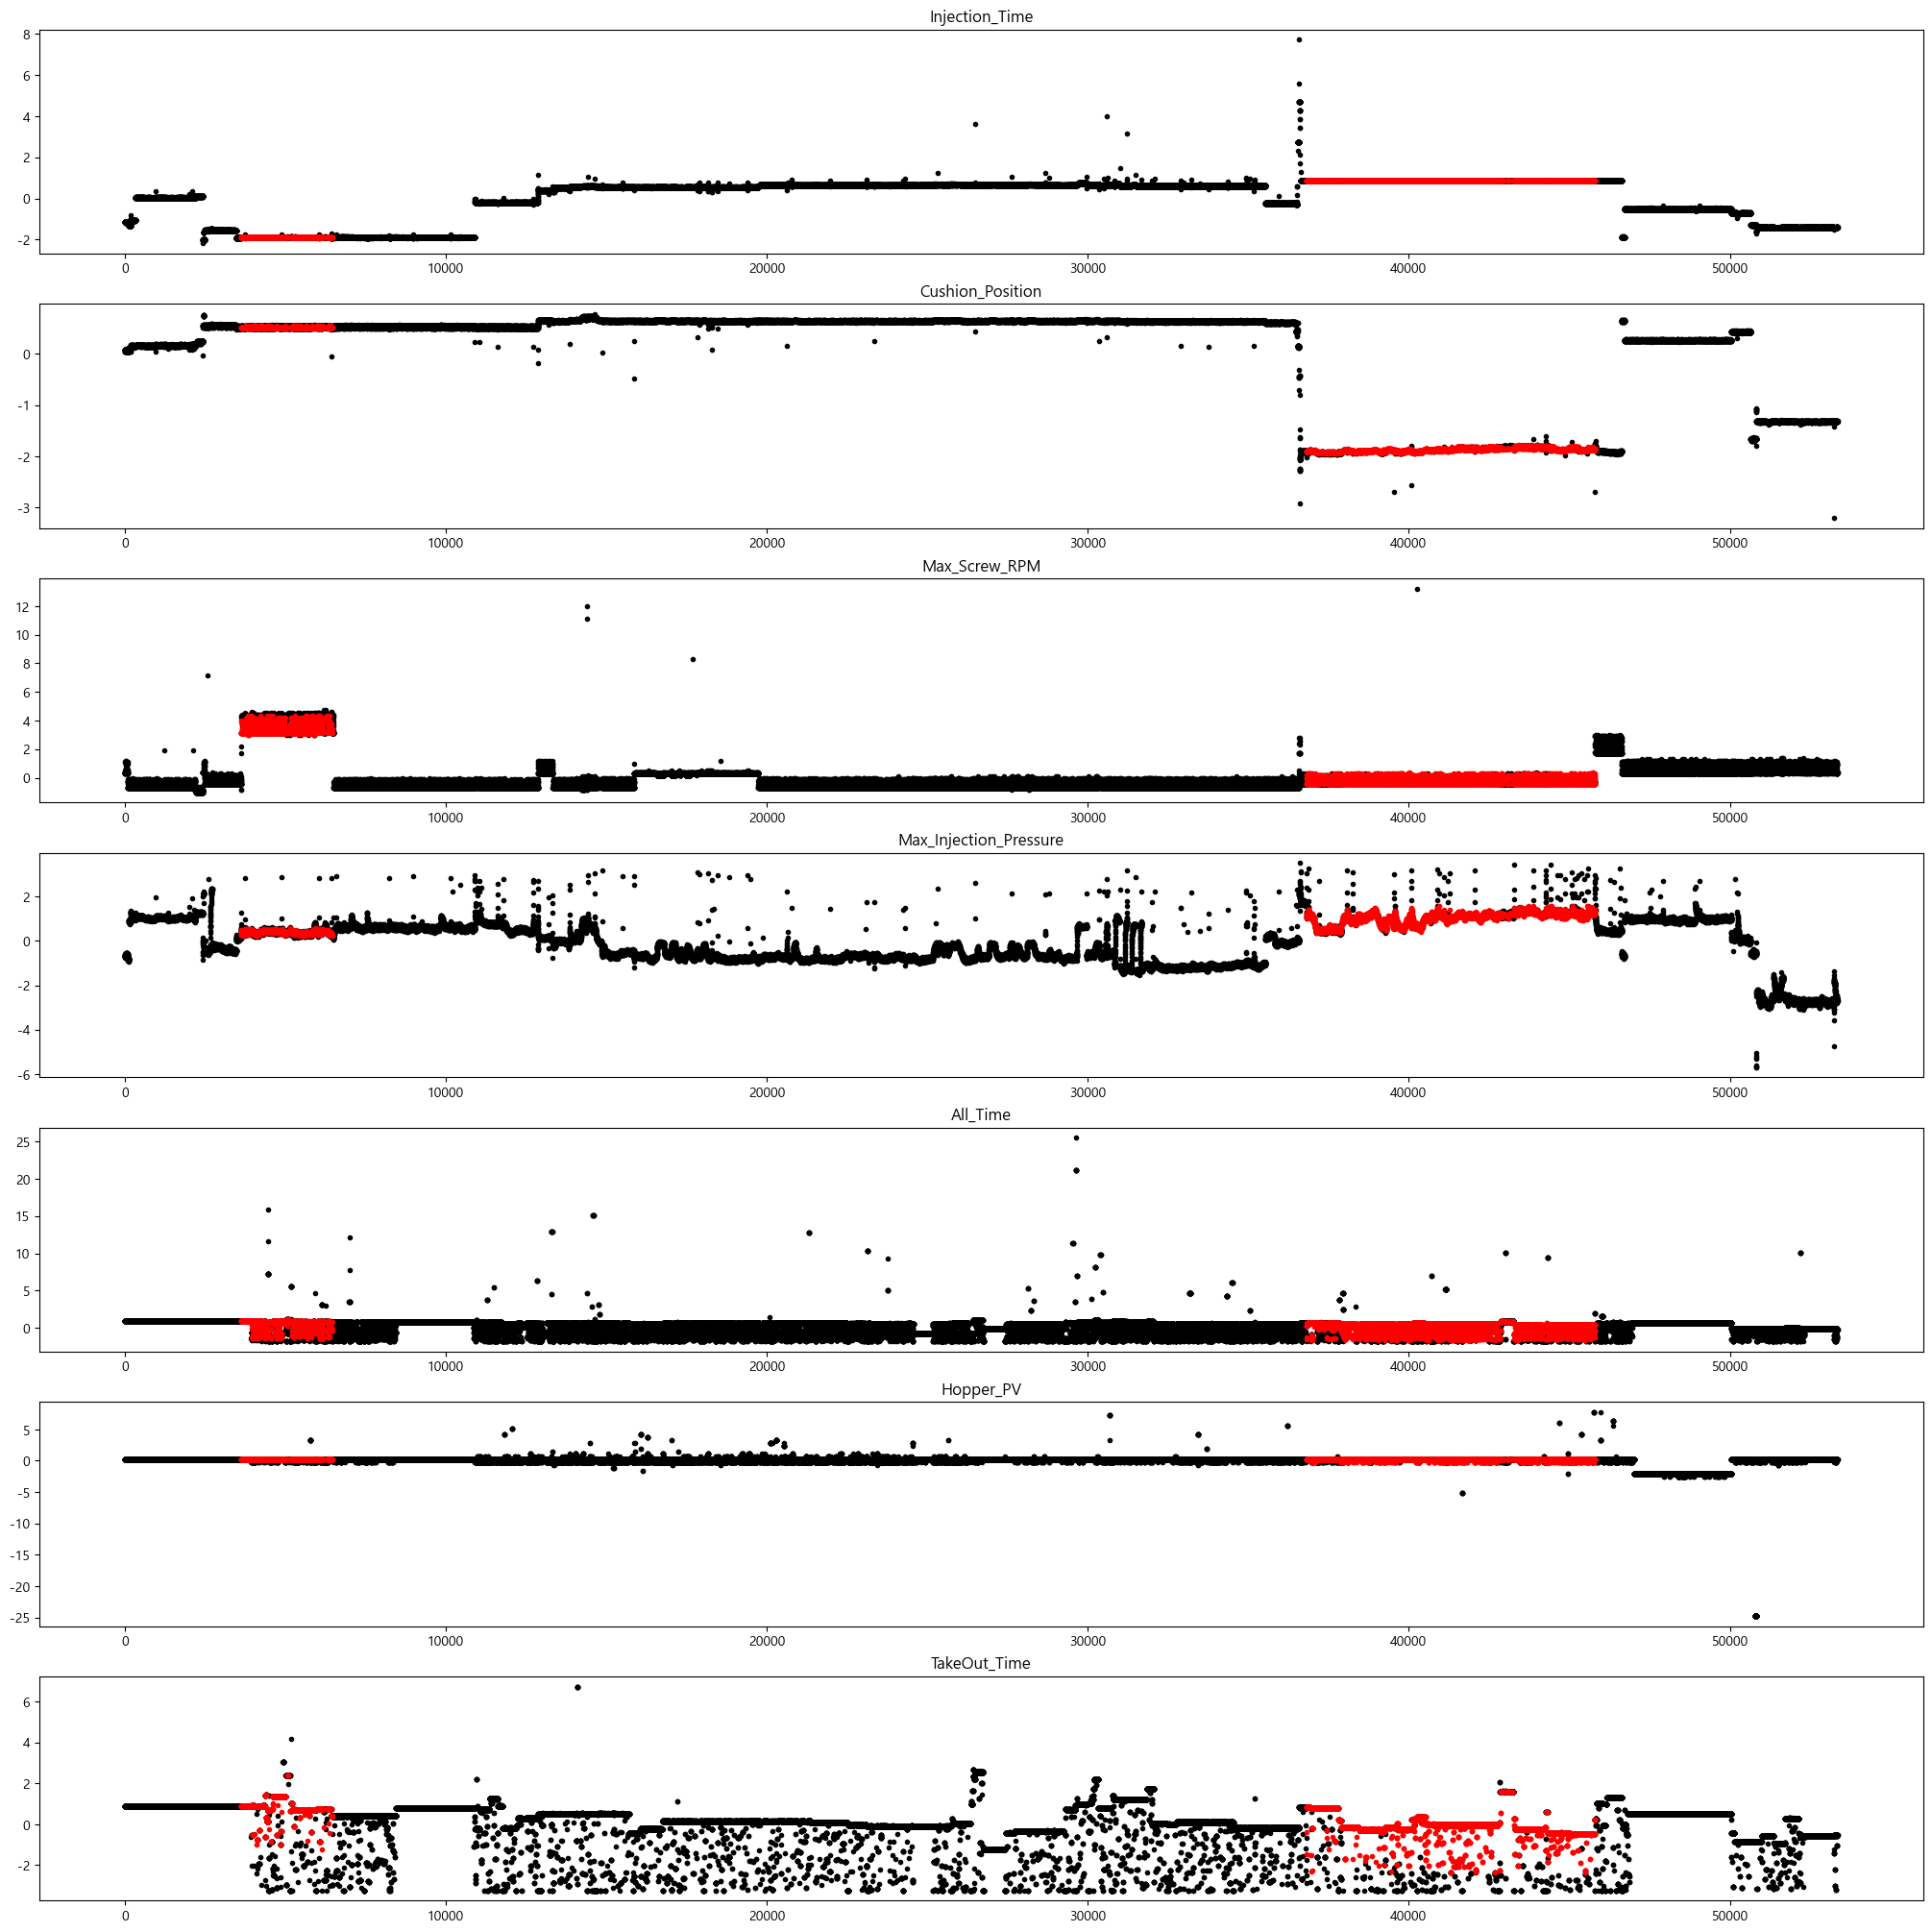

In [25]:
fig, axs = plt.subplots(7, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_index, i], '.k')
    axs[i].plot(scaled_df.iloc[anomalies.index, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

In [26]:
## Gausian_label


process_df['Gausian_Label'] = 1

process_df.loc[anomalies.index, 'Gausian_Label'] = 2

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Mahalanobis Distance

In [27]:
clf = MinCovDet()

# 모델 학습
clf.fit(scaled_df)

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.899567828002304 > -78.033734837632565). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.878966066875218 > -78.025922538177809). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-16.165979891350808 > -78.279097587942672). You may want to try wi

MinCovDet()

In [28]:
mahal_dist = clf.mahalanobis(scaled_df)

In [29]:
threshold = np.percentile(mahal_dist, 90)

anommal_idx = np.where(mahal_dist > threshold)[0]

In [30]:
normal_index = scaled_df.index.difference(anommal_idx)

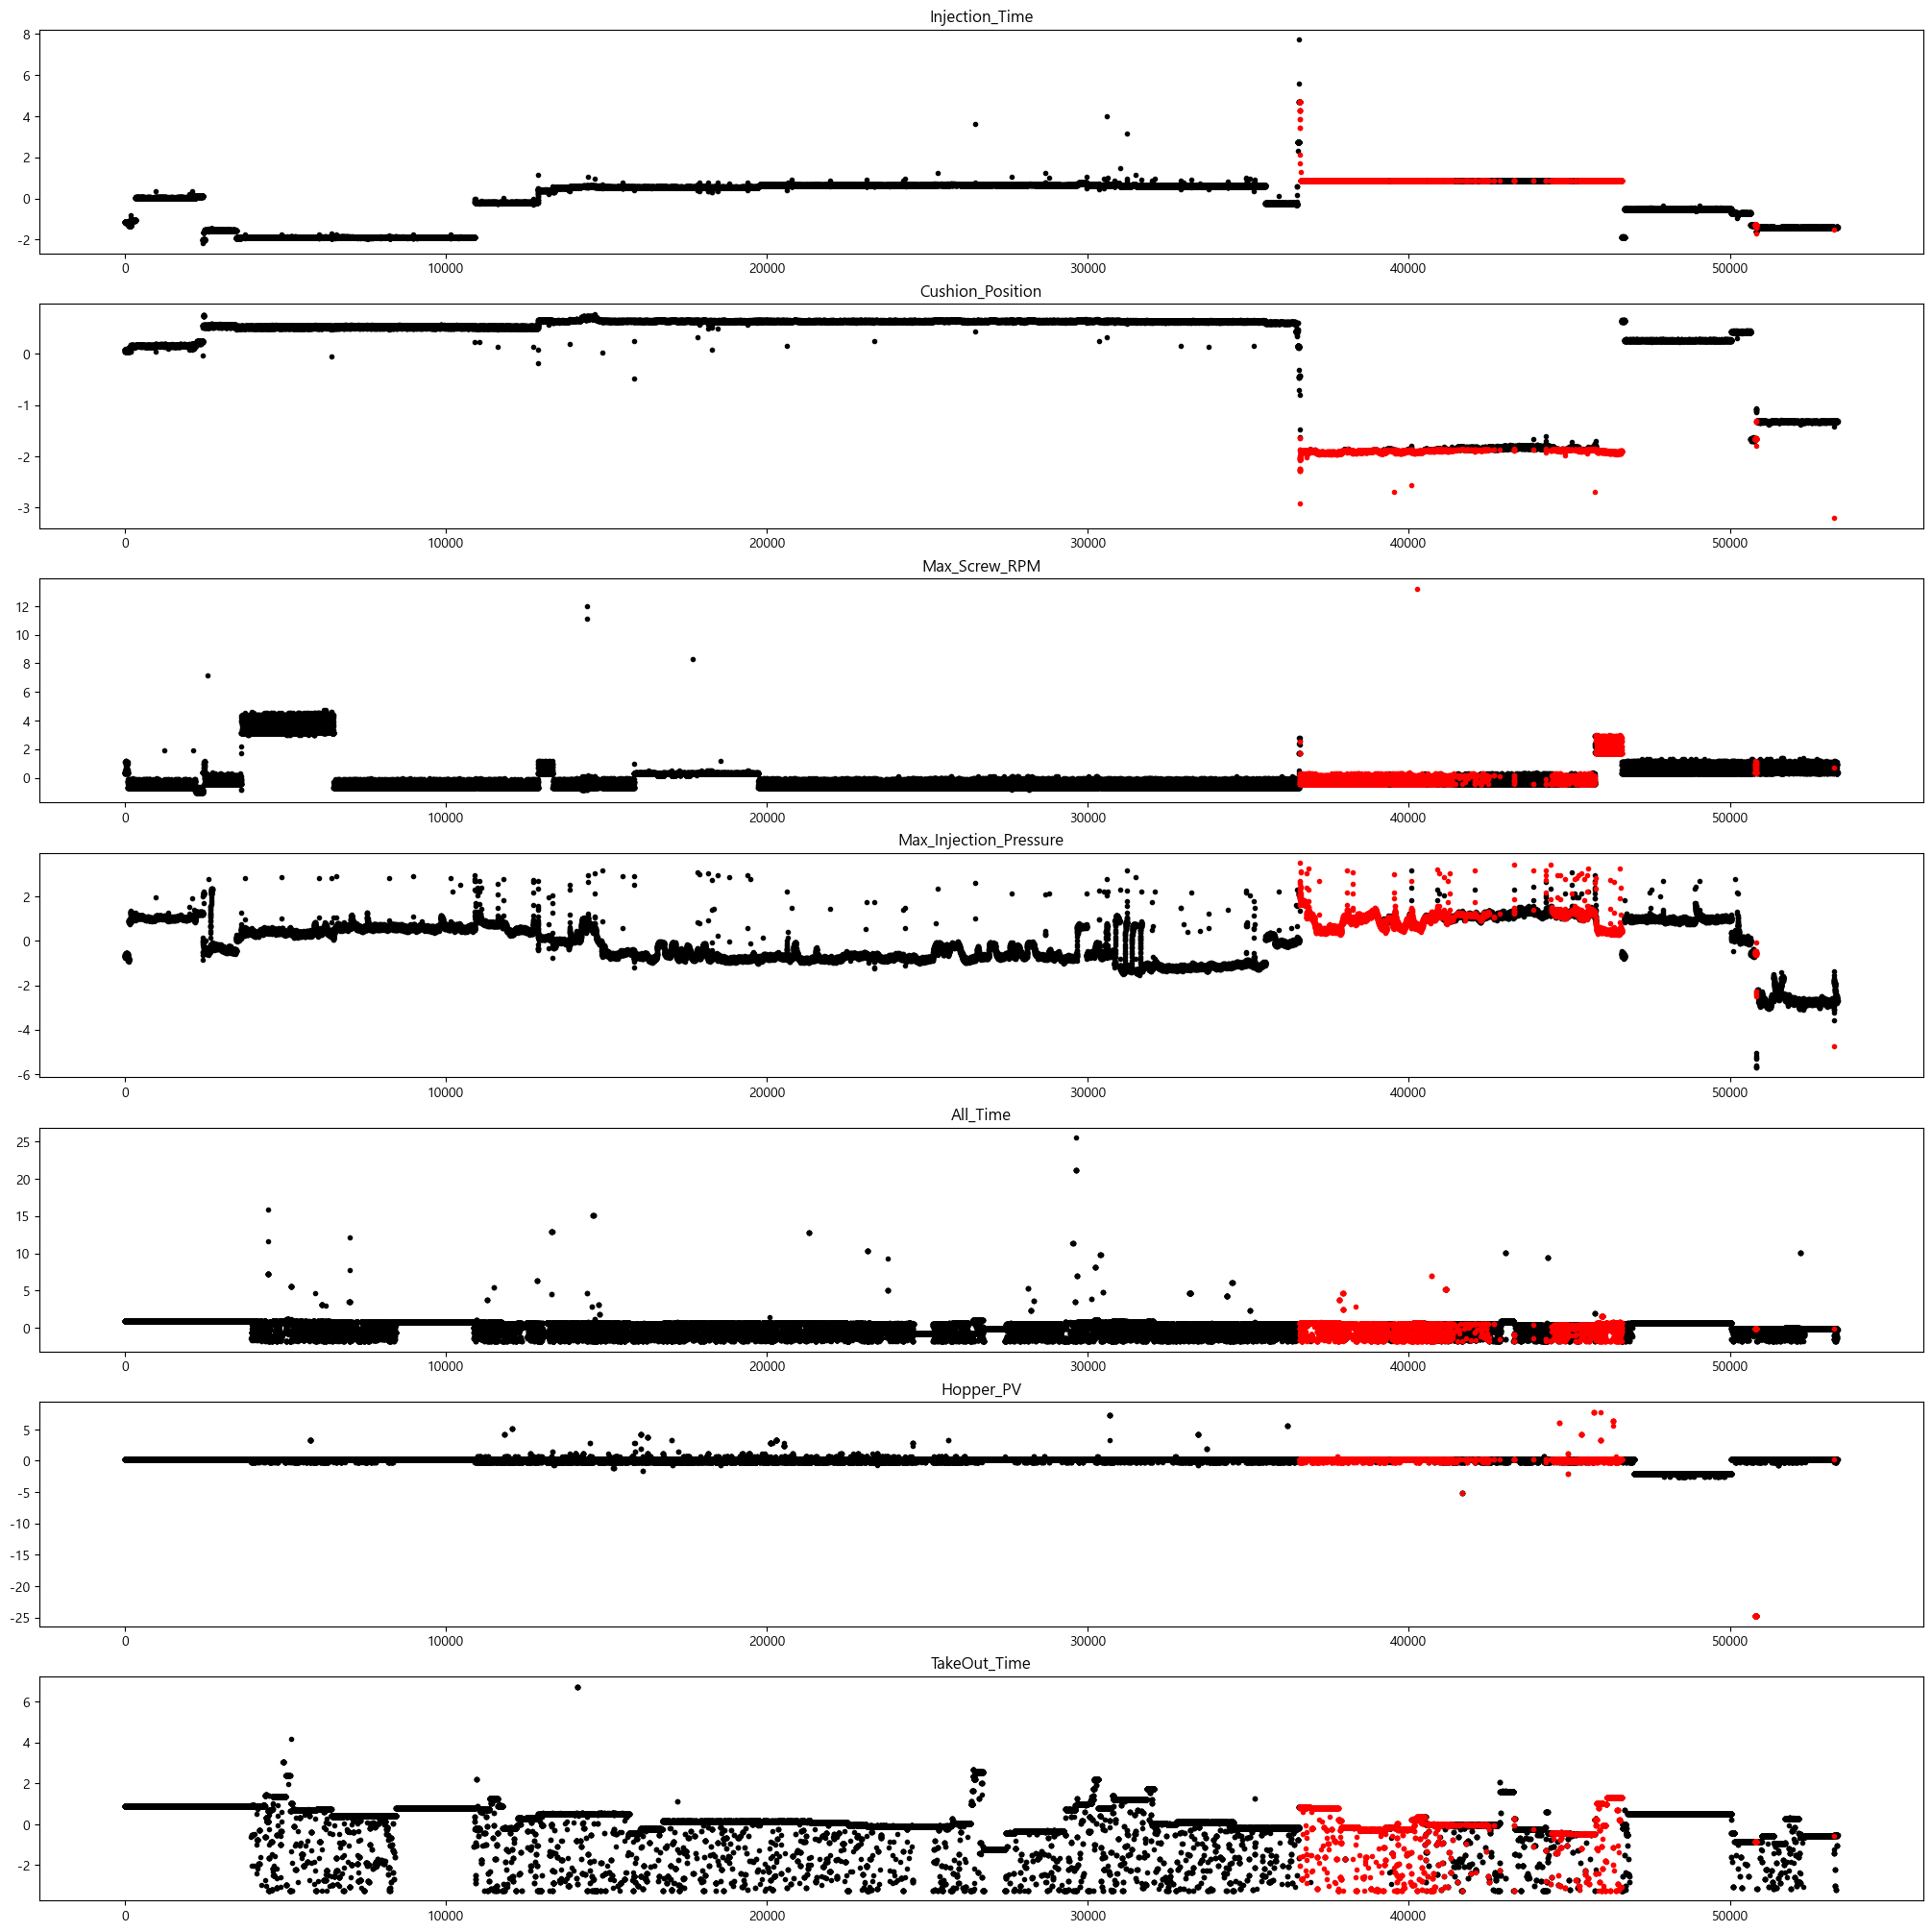

In [31]:
fig, axs = plt.subplots(7, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_index, i], '.k')
    axs[i].plot(scaled_df.iloc[anommal_idx, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

In [32]:
## mahal_label


process_df['mahal_label'] = 1

process_df.loc[anommal_idx, 'mahal_label'] = 2

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# isolation forest mad

In [33]:
from sklearn.ensemble import IsolationForest

# 모델 생성 및 학습
clf = IsolationForest(contamination=0.05)  # contamination은 이상치 비율을 나타냅니다.
clf.fit(scaled_df)

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.05)

In [34]:
# 이상 데이터 예측
predictions = clf.predict(scaled_df)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
normal_idx = np.where(predictions==1)[0]
anommal_idx = np.where(predictions==-1)[0]


In [36]:
fig, axs = plt.subplots(7, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_idx, i], '.k')
    axs[i].plot(scaled_df.iloc[anommal_idx, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

In [37]:
## isolation_label


process_df['isolation_label'] = 1

process_df.loc[anommal_idx, 'isolation_label'] = 2

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### LSTM AE MAD

In [38]:

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model



In [39]:

data = scaled_df.values  # 10차원 다중 변수 데이터 예제
# 데이터 전처리
sequence_length = 1  # 시퀀스 길이
X = []
for i in range(len(data) - sequence_length + 1):
    X.append(data[i:i+sequence_length])

X = np.array(X)

In [40]:
X.shape

(53353, 1, 7)

In [41]:
# 모델 구성
input_layer = Input(shape=(sequence_length, 7))
encoded = LSTM(5, activation='relu', return_sequences=True)(input_layer)
encoded = LSTM(10, activation='relu', return_sequences=False)(encoded)
decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(10, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(7))(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mse')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [42]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 7)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 5)              260       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                640       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 7)              77        
Total params: 1,817
Trainable params: 1,817
Non-trainable params: 0
___________________________________________________________

In [43]:
# 모델 학습
autoencoder.fit(X, X, epochs=15, batch_size=32, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 53353 samples
Epoch 1/15
53353/53353 [==============================] - 6s 113us/sample - loss: 0.4074
Epoch 2/15
53353/53353 [==============================] - 5s 100us/sample - loss: 0.1272
Epoch 3/15
53353/53353 [==============================] - 6s 108us/sample - loss: 0.0770
Epoch 4/15
53353/53353 [==============================] - 8s 143us/sample - loss: 0.0534
Epoch 5/15
53353/53353 [==============================] - 8s 146us/sample - loss: 0.0409
Epoch 6/15
53353/53353 [==============================] - 7s 135us/sample - loss: 0.0346
Epoch 7/15
53353/53353 [==============================] - 8s 141us/sample - loss: 0.0303
Epoch 8/15
53353/53353 [==============================] - 7s 135us/sample - loss: 0.0278
Epoch 9/15
53353/53353 [==============================] - 7s 126us/sample - loss: 0.0261
Epoch 10/15
53353/53353 [==============================] - 7s 124us/sample - loss:

In [44]:
predictions = autoencoder.predict(X)

In [45]:

# 재구성 손실 계산
reconstruction_loss = np.mean(np.square(X - predictions))

# 재구성 손실을 기반으로 이상 감지 여부 판단
threshold = 0.1  # 임계값 조정
if reconstruction_loss > threshold:
    print("이상 감지: Reconstruction Loss =", reconstruction_loss)
else:
    print("정상 데이터: Reconstruction Loss =", reconstruction_loss)

정상 데이터: Reconstruction Loss = 0.018818452627030826


In [46]:
anomal_index = []
normal_idx = []


for i in range(predictions.shape[0]):
    # 재구성 손실 계산
    reconstruction_loss = np.mean(np.square(X[i] - predictions[i]))

    # 재구성 손실을 기반으로 이상 감지 여부 판단
    threshold = 0.15  # 임계값 조정
    if reconstruction_loss > threshold:
        anomal_index.append(i)
    else:
        normal_idx.append(i)

In [47]:
X[anomal_index].shape

(689, 1, 7)

In [48]:
normal_index = scaled_df.index.difference(anomal_index)
normal_index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            53343, 53344, 53345, 53346, 53347, 53348, 53349, 53350, 53351,
            53352],
           dtype='int64', length=52664)

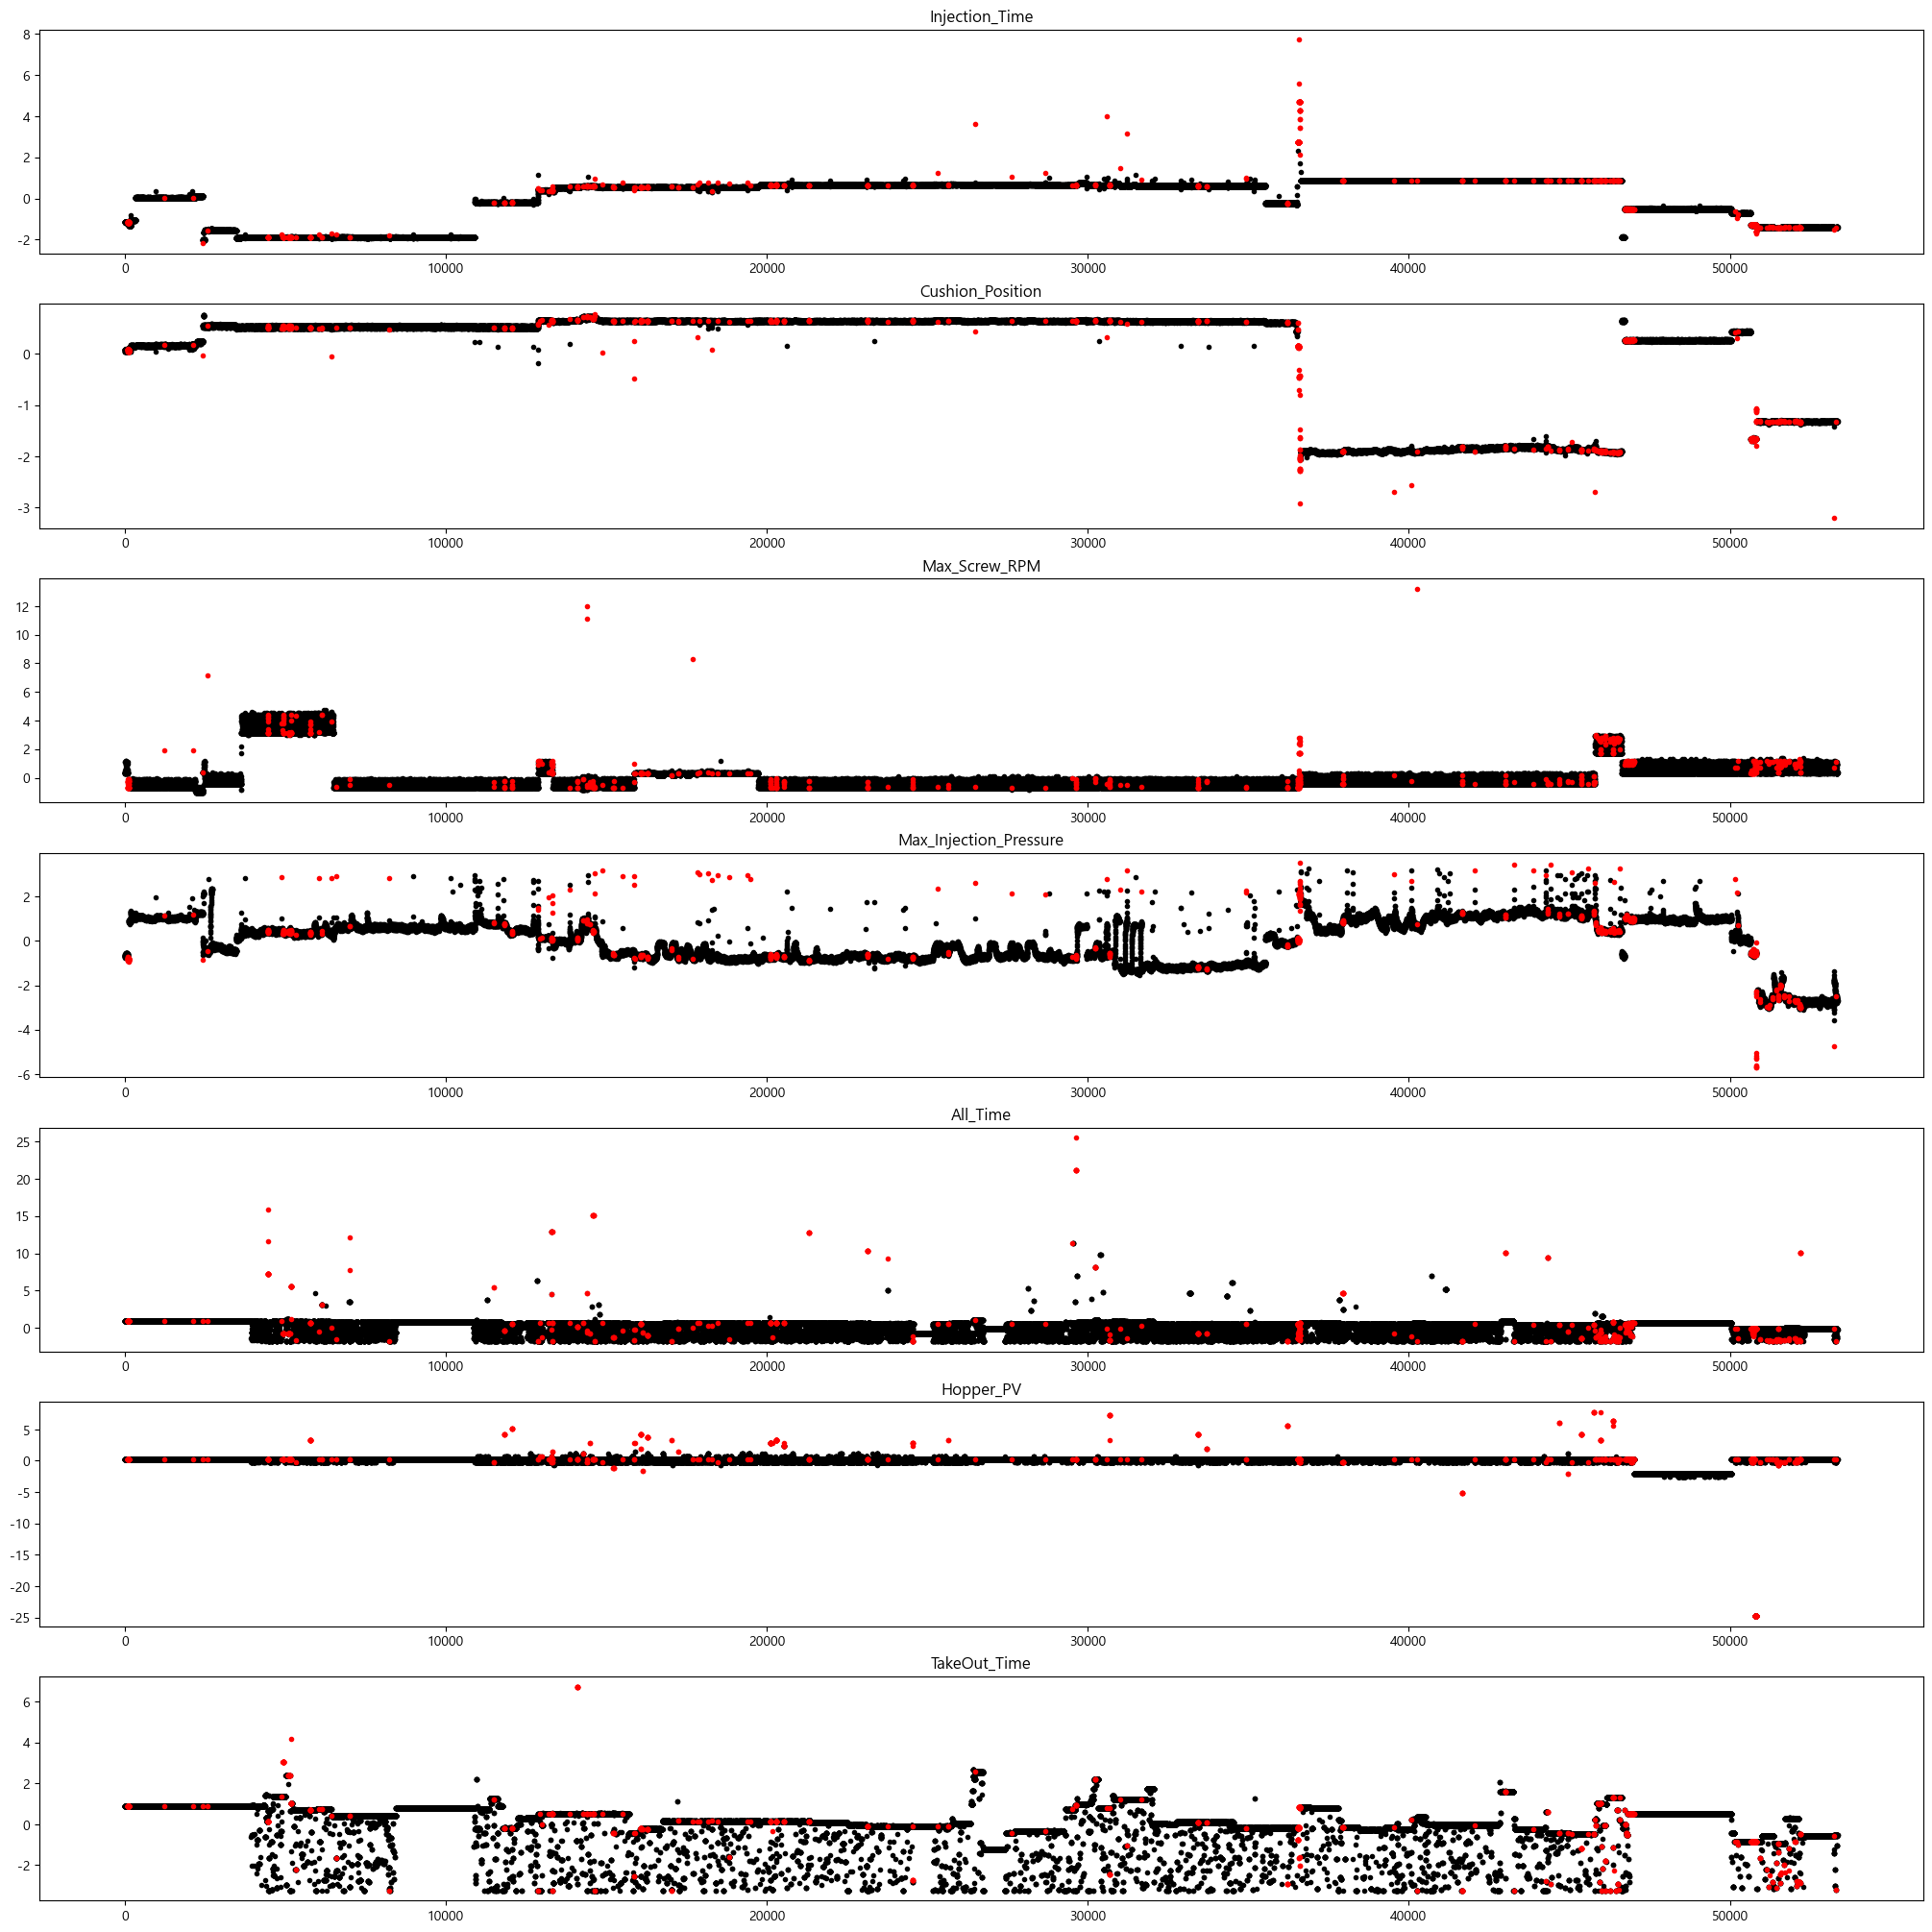

In [49]:
fig, axs = plt.subplots(7, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_index, i], '.k')
    axs[i].plot(scaled_df.iloc[anomal_index, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

In [50]:
## lstmae_label


process_df['lstmae_label'] = 1

process_df.loc[anomal_index, 'lstmae_label'] = 2

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [88]:
results_list = [process_df['Gausian_Label'].values, process_df['isolation_label'].values, process_df['lstmae_label'].values]

In [89]:
from statistics import mode

from scipy import stats as s

    
# Hard Voting 
def hard_voting(predictions : list) -> np.array:
    return [int(s.mode(v)[0]) for v in np.array(predictions).T]


hv_predictions = hard_voting(results_list)

In [90]:
pseudo_df = weight[val_cols].copy()

In [91]:
pseudo_df['label'] = hv_predictions

In [92]:
pseudo_df

Injection_Time  Cushion_Position  Max_Screw_RPM  \
0                7.66              21.6           69.0   
1                7.66              21.6           62.0   
2                7.66              21.5           61.0   
3                7.66              21.6           69.0   
4                7.66              21.6           62.0   
...               ...               ...            ...   
53348            7.36              15.0           61.0   
53349            7.36              15.0           61.0   
53350            7.38              15.1           61.0   
53351            7.36              15.1           62.0   
53352            7.38              15.0           62.0   

       Max_Injection_Pressure  All_Time  Hopper_PV  TakeOut_Time  label  
0                   92.800003     45.19       80.0         11.95      1  
1                   93.199997     45.19       80.0         11.95      1  
2                   92.800003     45.19       80.0         11.95      1  
3                   92.699997     45.19       80.0         11.95      1  
4                   92.699997     45.19       80.0         11.95      1  
...                       ...       ...        ...           ...    ...  
53348               80.400002     26.33       80.0          7.79      1  
53349               81.099998     26.33       80.0          7.79      1  
53350               80.900002     26.33       80.0          7.79      1  
53351               80.800003     26.33       80.0          7.79      1  
53352               81.099998     26.33       80.0          7.79      1  

[53353 rows x 8 columns]

In [93]:
pseudo_anomaly = pseudo_df[pseudo_df['label']==2].index
pseudo_normaly = pseudo_df[pseudo_df['label']==1].index

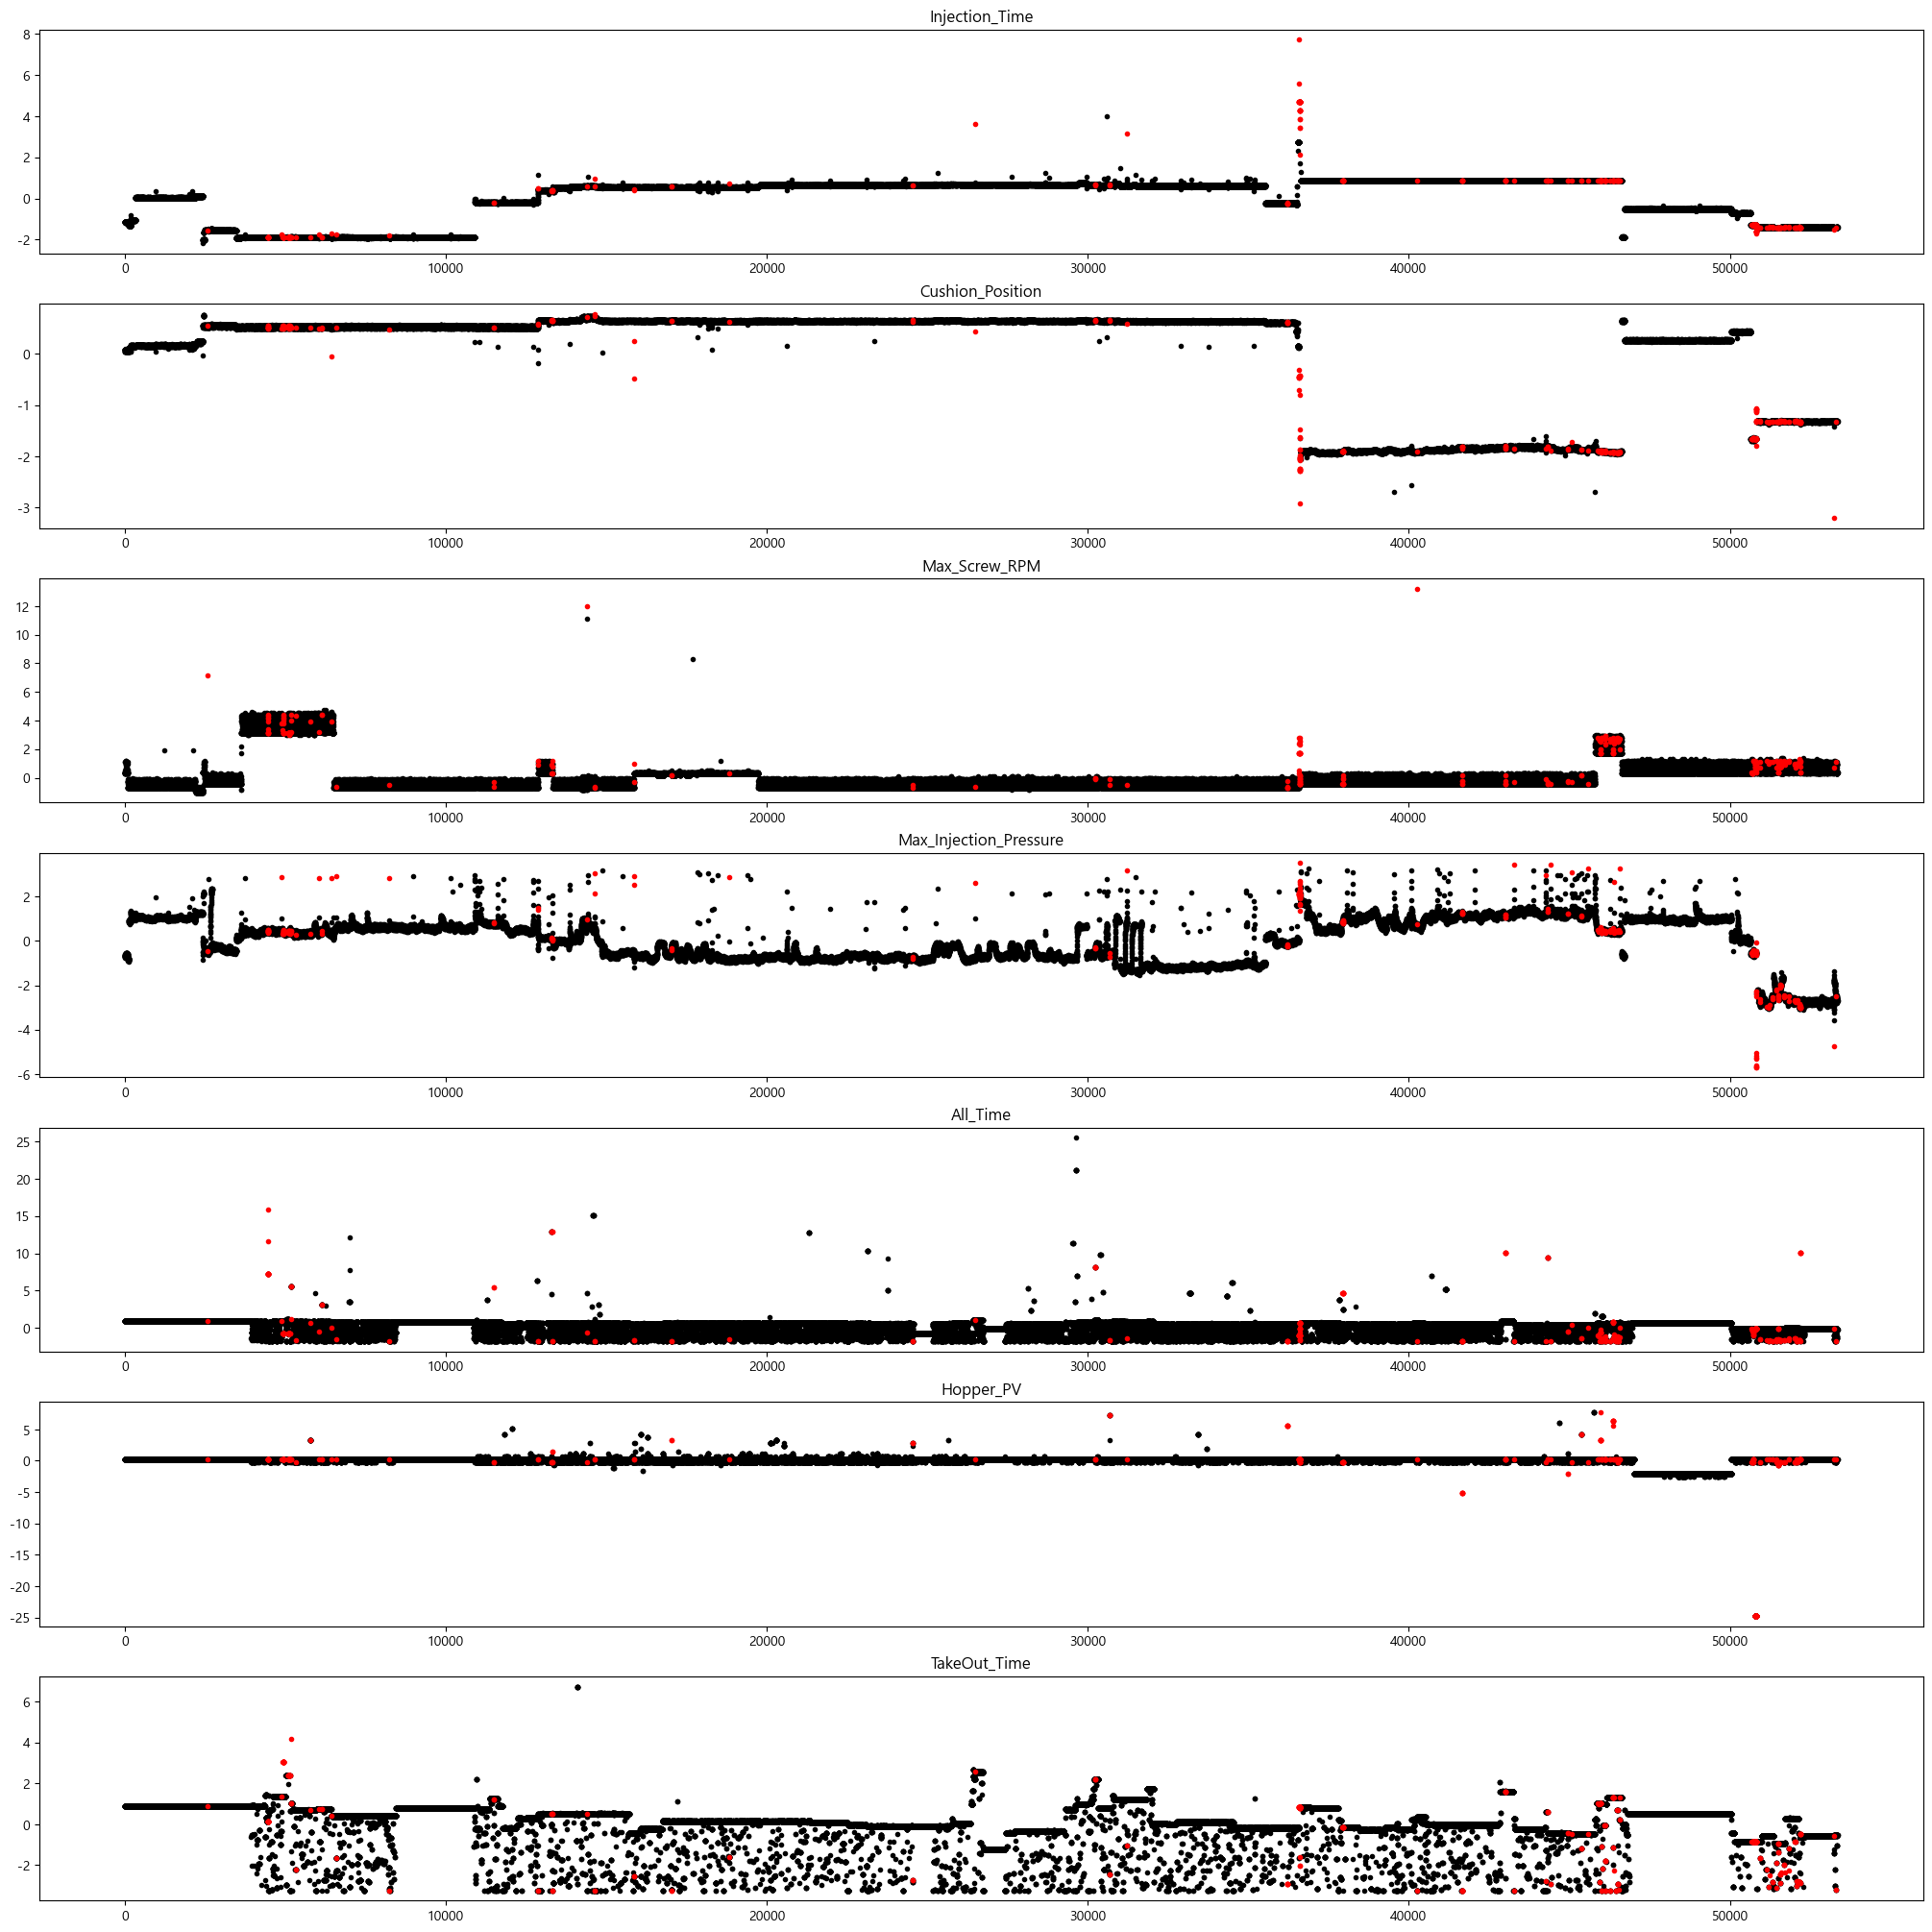

In [94]:
fig, axs = plt.subplots(7, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[pseudo_normaly, i], '.k')
    axs[i].plot(scaled_df.iloc[pseudo_anomaly, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

### Supervised Learing

In [95]:

# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'label'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('int') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)

    scaler.fit(X_train)

    scaled_x_train = scaler.transform(X_train)
    scaled_x_test = scaler.transform(X_test)

    train_test_dict['test_x'] = scaled_x_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = scaled_x_train
    train_test_dict['train_y'] = y_train

    return train_test_dict

train_test_dict = data_split(input_df=pseudo_df, y_col='label')

In [96]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


def smote_over_sampling(X_train, y_train, verbose=True):

    smote = SMOTE(random_state=55)
    x_over, y_over = smote.fit_resample(X_train, y_train)
    if verbose:
        print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
        print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_over.shape, y_over.shape)
        print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())


    return x_over, y_over


In [97]:
train_test_dict['train_x'], train_test_dict['train_y'] = smote_over_sampling(train_test_dict['train_x'], train_test_dict['train_y'])

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (42682, 7) (42682,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (84912, 7) (84912,)
SMOTE 적용 후 레이블 값 분포: 
 1    42456
2    42456
dtype: int64


In [98]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [ ]:


xgb_params = {'max_depth': [3, 6, 10, 15],
         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.5, 1.0, 0.1),
         'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
         'n_estimators': [100, 250, 500, 750],
         'num_class': [1]
        }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
rs_cv = RandomizedSearchCV(estimator=xgbclf, param_distributions=xgb_params, scoring='accuracy',n_iter=25,n_jobs=4, verbose=1)

rs_res =rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])

print("Best: %f using %s" % (rs_res.best_score_, rs_res.best_params_))

means = rs_res.cv_results_['mean_test_score']
stds = rs_res.cv_results_['std_test_score']
params = rs_res.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [100]:
feature_names = list(pseudo_df.columns[:-1])

In [101]:
params = {'subsample': 0.7999999999999999, 'num_class': 1, 'n_estimators': 750, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7}

In [102]:

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = xgb_clf.predict(train_test_dict['train_x'])
y_xgb = xgb_clf.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_xgb))
print(classification_report(train_test_dict['test_y'], y_xgb))


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set accuracy:  1.0
Test set accuracy:  0.9985006091275419
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10608
           2       0.91      0.83      0.87        63

    accuracy                           1.00     10671
   macro avg       0.96      0.91      0.93     10671
weighted avg       1.00      1.00      1.00     10671



<AxesSubplot:title={'center':'total_cover'}, ylabel='Features'>

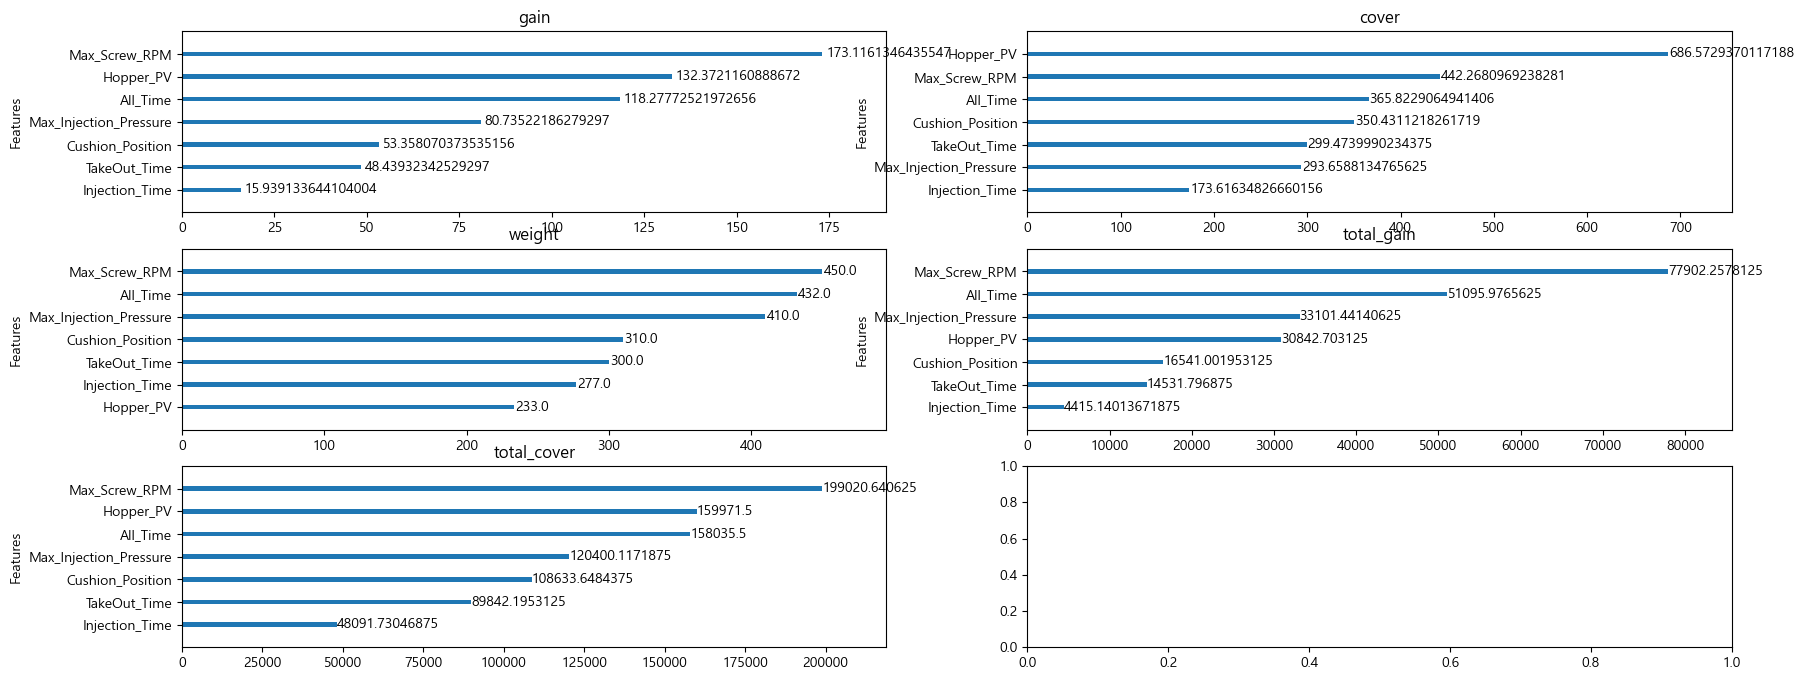

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,8))

axes = [ax for row_axes in axes for ax in row_axes]
xgb_clf.get_booster().feature_names = feature_names
xgb.plot_importance(xgb_clf, importance_type='gain',title='gain', xlabel='', grid=False, ax=axes[0])
xgb.plot_importance(xgb_clf, importance_type='cover',title='cover', xlabel='', grid=False, ax=axes[1])
xgb.plot_importance(xgb_clf, importance_type='weight',title='weight', xlabel='', grid=False, ax=axes[2])
xgb.plot_importance(xgb_clf, importance_type='total_gain',title='total_gain', xlabel='', grid=False, ax=axes[3])
xgb.plot_importance(xgb_clf, importance_type='total_cover',title='total_cover', xlabel='', grid=False, ax=axes[4])